# Filter Coeffecient Calculation

In [20]:
import numpy as np
import scipy.io
from scipy.signal import kaiserord, lfilter, firwin, freqz, kaiser, convolve, hamming, remez, hann

import matplotlib as mpl
import matplotlib.pyplot as plt

In [21]:
USER_FILE_ADR = './data/1/ECA-Anish-October31_Step1_9_1.mat'
FILTER_COEF_ADR = './filter_coef_{}.csv'

In [22]:
mat = scipy.io.loadmat(USER_FILE_ADR)

In [23]:
mat_array = np.array(mat['a'])
mat_array.shape

(33, 65000)

In [24]:
# mat_seg = mat_array[...,0:1500]
mat_seg = mat_array
mat_seg.shape

(33, 65000)

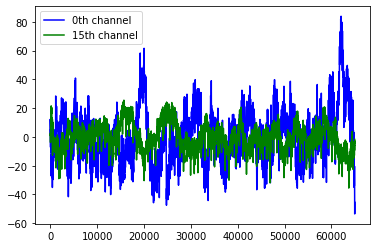

In [25]:
plt.plot(mat_seg[0], 'b')
plt.plot(mat_seg[15], 'g')
plt.legend(['0th channel', '15th channel'])
plt.show()

In [26]:
def window_mean(X, window_len=200):
    windowed_signal = []
    for step in range(0, len(X), window_len):
        window = np.mean(X[step:step+window_len], axis=1)
        windowed_signal.append(window)
    return np.array(windowed_signal)

def channel_mean_across_time(X):
    return np.mean(X, axis=1)

In [27]:
fs = 500.0                      # sampling rate
T = 1/fs                        # sample time

In [28]:
def single_channel_basic_filter(input_signal, filter_coef_array):
    filtered = []
    for band in range(len(filter_coef_array)):
        filtered.append(convolve(filter_coef_array[band]/filter_coef_array[band].sum(), input_signal, mode='valid'))
    return filtered

In [29]:
# https://www.vyssotski.ch/BasicsOfInstrumentation/SpikeSorting/Design_of_FIR_Filters.pdf
# Design of FIR Filters
# Elena Punskaya (www-sigproc.eng.cam.ac.uk/~op205 )

# ============================
#     FILTER COEFs
# ============================

filter_coef = []
order = []
cutoff = [0, 4, 8, 12, 30, 100]

for band in range(0, len(cutoff)-1):
    wl = 2*cutoff[band]/fs*np.pi
    wh = 2*cutoff[band+1]/fs*np.pi
    if not np.isinf(wh):
        M = int(8*np.pi/(wh-wl))
    else:
        M = 512
    bn = np.zeros(M)
    for i in range(M):
        n = i - M/2
        # https://www.sciencedirect.com/topics/engineering/hamming-window
        # Finite Impulse Response Filter Design
        # Li Tan, Jean Jiang, in Digital Signal Processing (Second Edition), 2013
        if (n == 0):
            bn[i] = wh/np.pi - wl/np.pi;
        elif not np.isinf(n):
            bn[i] = (np.sin(wh*n))/(np.pi*n) - (np.sin(wl*n))/(np.pi*n)
    bn = bn*hamming(M)
    filter_coef.append(bn)
    order.append(M)

filter_coef_dict = {
    'delta': filter_coef[0],
    'theta': filter_coef[1],
    'alpha': filter_coef[2],
    'beta': filter_coef[3],
    'gamma': filter_coef[4]
}
order_dict = {
    'delta': order[0],
    'theta': order[1],
    'alpha': order[2],
    'beta': order[3],
    'gamma': order[4]
}

SAVE_FILTER_COEF = True
if SAVE_FILTER_COEF:
    for key in filter_coef_dict.keys():
        np.savetxt(FILTER_COEF_ADR.format(key), filter_coef_dict[key], delimiter=",")

In [30]:
# filtered

In [19]:
final_output_signal = []
for i_channel in range(0, 32):
    y = mat_seg[i_channel]          # the signal, study channel 'ch'
    L = len(y)                      # signal length
    t = np.linspace(1,L,L)*T        # time vector
    print("\033[4mChannel ", i_channel,"\b started\033[0m")
    
    filtered = single_channel_basic_filter(y, filter_coef)
    print(len(filtered), "Channels filtered.")
    for i in range(len(filtered)):
        print("Band",i ,"Length =", len(filtered[i]))
    
    print("Windowing Signal...")
    windowed_signals = []
    for i in range(len(filtered)):
        windowed_signals.append(window_mean(filtered[i]))
    
    for i in range(len(windowed_signals)):
        print("Band",i ,"Length =", len(windowed_signals[i]))
        
    final_output_signal.append({
        'delta': windowed_signals[0],
        'theta': windowed_signals[1],
        'alpha': windowed_signals[2],
        'beta': windowed_signals[3],
        'gamma': windowed_signals[4]
    })
    print()

NameError: name 'mat_seg' is not defined